# Social Recommendation System using Content based Approach

## Group 5

In [26]:
import numpy as np
from sklearn.manifold import TSNE
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors


[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import os

## Data Analysis

In [ ]:
file_name = 'ep.txt'
home_directory = os.path.expanduser("~")
file_path = os.path.join(home_directory, file_name)
with open(file_path, 'w', encoding="utf-8") as file:
    for index, row in df.iterrows():
        row_as_list = row.to_list()
        result_string = ' '.join(map(str, row_as_list))
        modified_string = result_string.replace(' ', ',', 5)
        file.write(modified_string + '\n')
print("Text file saved successfully at:", file_path)

In [13]:
dfs = pd.read_csv(r"C:\Users\Shubham Gupta\ep.txt", encoding='unicode_escape', header=None)
dfs.columns = ['#item', 'user', 'paid', 'time', 'stars', 'words'] 
df_epinions = pd.DataFrame(dfs)

In [14]:
df_epinions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   #item   198130 non-null  object
 1   user    200852 non-null  object
 2   paid    200417 non-null  object
 3   time    198044 non-null  object
 4   stars   198034 non-null  object
 5   words   200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [15]:
df_epinions['paid'].value_counts()

paid
200.0         3696
100.0         3344
150.0         3278
300.0         2940
250.0         2807
              ... 
95.45            1
3-5              1
about18000       1
6430.0           1
42155.0          1
Name: count, Length: 11455, dtype: int64

In [16]:
df_epinions.describe()

,#item,user,paid,time,stars,words
count,198130,200852,200417,198044,198034,200853
unique,43055,121224,11455,5031,685,191020
top,Nokia_8260_AMPS_D_AMPS_Cellular_Phone_Cellular...,Dr_Steph,200.0,i,5.0,nan nan nan nan nan
freq,284,89,3696,869,78509,5237


In [17]:
df_epinions.dropna(inplace= True)

In [18]:
df_epinions.duplicated().sum()

46

In [19]:
df_epinions.drop_duplicates()

,#item,user,paid,time,stars,words
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1027296000,4.0,i got this printer from minolta as a warranty ...
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1201305600,2.0,although i love my vaio especially the gorgeou...
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1118016000,4.0,this is my first laptop and i bought it about ...
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1149292800,4.0,just recently my sony dej001 walkman died on m...
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1012262400,5.0,well when i graduated from college it didnt ta...
...,...,...,...,...,...,...
200848,auto_Make-2002_Ford_Thunderbird,chris_baehr,100000.0,1012608000,2.0,ford has once again tried to bring back the th...
200849,auto_Make-2002_Ford_Thunderbird,BrianCam,44000.0,1016409600,4.0,ford thunderbird the name alone says so much a...
200850,auto_Make-2002_Ford_Thunderbird,lanh,41000.0,1051747200,1.0,price is very high per features offered when y...
200851,auto_Make-2002_Ford_Thunderbird,spdster2002,42155.0,1029974400,5.0,after a 5year break ford finally restores its ...


In [20]:
df_epinions.to_csv('epinions.csv',  
                index = None)

In [21]:
df_epinions = pd.read_csv('D:/SEM 2/Lab Assignments/Recommendation System/CP 1/Modified data files/epinions.csv')

In [22]:
df_epinions = df_epinions[1:]

In [23]:
df_epinions.head()

,#item,user,paid,time,stars,words
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1201305600,2.0,although i love my vaio especially the gorgeou...
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1118016000,4.0,this is my first laptop and i bought it about ...
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1149292800,4.0,just recently my sony dej001 walkman died on m...
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1012262400,5.0,well when i graduated from college it didnt ta...
5,pr-Sony_KV_36FS12__Standard_Televisions,daleb,1350.0,982281600,4.0,out of the box its an impressive television it...


In [24]:
len(df_epinions)

189929

In [25]:
len(df_epinions['#item'].unique())

41522

## Feature Extraction and NLP

In [234]:
df = pd.read_csv("D:/Recommender System Datasets/epinions_data/epinions.csv")
df=df[1:10000]
df = df.reset_index()

In [235]:
df

,index,#item,user,paid,time,stars,words
0,1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1201305600,2.0,although i love my vaio especially the gorgeou...
1,2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1118016000,4.0,this is my first laptop and i bought it about ...
2,3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1149292800,4.0,just recently my sony dej001 walkman died on m...
3,4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1012262400,5.0,well when i graduated from college it didnt ta...
4,5,pr-Sony_KV_36FS12__Standard_Televisions,daleb,1350.0,982281600,4.0,out of the box its an impressive television it...
...,...,...,...,...,...,...,...
9994,9995,Syntax_LT_42HVi_Television,ajmesser,1400.0,1168473600,1.0,i bought this tv and soon discovered that ther...
9995,9996,Syntax_LT_42HVi_Television,conjo,1695.0,1148169600,5.0,i purchased this tv because of price resolutio...
9996,9997,Syntax_LT_42HVi_Television,hshipley,2200.0,1137369600,4.0,i purchased one of these tvs about one month a...
9997,9998,Syntax_LT_42HVi_Television,a7926,2195.0,1138147200,4.0,any price conscious person should look at this...


In [236]:

def _removeNonAscii(s):
    s=str(s)
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    text=str(text)
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['words'].apply(_removeNonAscii)

df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

## Representation of reviews and Mapping them with users

In [237]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())


In [239]:

model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, 
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
model.build_vocab(corpus, progress_per=200)
model.train(corpus, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)


(6464194, 7120550)

In [ ]:
ms = model.wv.similar_by_vector('every', topn= 6)[1:]
ms

In [240]:
def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []
    arr=[]
    # Reading the each book description
    for index, row in df.iterrows():
        line=row['cleaned']
        avgword2vec = None
        count = 0
        """
        for word in model.wv.key_to_index:
            if(word not in line.split()):
                arr.append(0)
            else:
                arr.append(model.wv.key_to_index[word])
        """
        
        for word in line.split():
            if word in model.wv:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
        
        
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
        word_embeddings.append([row['#item'],avgword2vec])

In [241]:
vectors(df)
len(word_embeddings)

9999

In [242]:
#Building TFIDF model and calculate TFIDF score

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
tfidf.fit(df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

c:\users\shashwat\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [243]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
c=0
for desc in corpus: 
    
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(100) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in model.wv and word in tfidf_feature:
            vec = model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    
    if weight_sum != 0:
        sent_vec /= weight_sum
        
        #sent_vec=np.dot(sent_vec, st)
        #sent_vec=list(np.array(sent_vec)*np.array(st))
        #print(sent_vec)
    sent_vec=np.dot(sent_vec,int(df[c:c+1]["stars"]))
    
    tfidf_vectors.append(sent_vec)
    line += 1
    c=c+1

## Designing the Content based systems using the Tf-Idf and Word2Vec

In [244]:
def recommendations(cleaned):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    
    # taking the title and book image link and store in new data frame called books
    books = df[['#item', 'cleaned', 'words']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['cleaned']).drop_duplicates()
    #print(indices.shape)
    
    idx = indices[cleaned]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    sim_scores = sim_scores[0:6]
    
    return sim_scores
    
        

In [205]:
import requests
from bs4 import BeautifulSoup

def find_title(work):
    a=int(work)
    r = requests.get('https://www.librarything.com/work/'+str(a)+'/workdetails') 

    soup = BeautifulSoup(r.content, 'html.parser') 

    t=str(soup.title)
    t=t.replace("<title>Workdetails: ","")
    t=t.replace(" | LibraryThing</title>","")
    return t


In [247]:
def final_rec(user):
    books = df[['#item', 'cleaned', 'words']]
    dfn = df[df['user']==user]
    c=[]
    for index, row in dfn.iterrows():
        c.append(recommendations(row['cleaned']))
    k=[]
    for i in c:
        for j in i:
            k.append(j)
    k = sorted(k, key = lambda x: x[1], reverse = True)
    k = k[0:6]

    
    book_indices = [i[0] for i in k]
    recommend = books.iloc[book_indices]
    rec=[]
    for index, row in recommend.iterrows():
        #print(find_title(row['#item']))
        print(row['#item'])
        rec.append(row["#item"])
    return rec
    


In [248]:
rec=final_rec('200067')

Epson_EPLl_5700i_Laser_Printer__Printers_C363001
pr-Acer_Professional_1240UT_Flatbed_Scanner
cmhd-Monitors-All-Viewsonic_VP181
Nokia_7160_Cellular_Phone
Digital_Products_International_OFFICEJET_J6480_AIO_PR_25_31PPM_1200DPI_US_EN_InkJet_Printer
pr-D-Link_DI_704P_DI-704P_Router


In [249]:

def evaluation(rec, user):
    bought=df[df['user']==user]
    liked=list(bought.where(df['stars']>=4)['#item'])
    disliked=bought.where(df['stars']<4)['#item']
    #precision=precision_score(list(bought['#item']), rec, average='macro')
    #precision_score(y_true, y_pred, average='macro')
    #print(bought)
    tp=0
    for i in liked:
        if(i in rec):
            tp=tp+1
    fn=0
    for i in liked:
        if(i not in rec):
            fn=fn+1
    fp=0
    for i in rec:
        if(i not in liked):
            fp=fp+1
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    print(precision)
    print(f1)
    print(recall)

In [250]:
bought=df[df['user']=='200067']
list(bought['#item'])

['Nokia_7160_Cellular_Phone',
 'Epson_EPLl_5700i_Laser_Printer__Printers_C363001',
 'cmhd-Monitors-All-Viewsonic_VP181',
 'pr-Acer_Professional_1240UT_Flatbed_Scanner']

In [251]:
evaluation(rec,'200067')

0.6666666666666666
0.8
1.0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
reviews=pd.read_csv("C:/Users/Shubham Gupta/Desktop/reviews2.csv")

In [29]:
reviews=reviews[1:]
reviews.head(10)

,Unnamed: 0,comment,nhelpful,unixtime,work,flags,user,stars,time
1,1,"Every evening, the brave queen of Persia, Shah...",0.0,1.332288e+09,73960.0,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
2,2,Its the 1983-84 school year and Edward Zanni o...,0.0,1.253405e+09,69413.0,[],rivkat,3.0,"Sep 20, 2009"
3,3,"I became privy to this book, when another auth...",0.0,1.299888e+09,9523995.0,[],suz.haugland,4.0,"Mar 12, 2011"
4,4,.,0.0,1.327277e+09,368228.0,[],amoskovacs,4.0,"Jan 23, 2012"
5,5,This is a tremendous story of a freed woman an...,0.0,1.329005e+09,11243828.0,[],CandyH,4.0,"Feb 12, 2012"
6,6,"And with this book, I am officially caught up ...",0.0,1.278893e+09,9071901.0,[],miyurose,2.0,"Jul 12, 2010"
7,7,What PUN!\nHaving a sister was weird. It was l...,0.0,1.315354e+09,4842812.0,[],melissaconway,3.0,"Sep 7, 2011"
8,8,A new designer drug that makes people very agg...,0.0,1.227226e+09,32125.0,[],mab2008,3.5,"Nov 21, 2008"
9,9,great,0.0,1.377216e+09,1110874.0,[],Mamajeanne,5.0,"Aug 23, 2013"
10,10,Beoordeling boek Grieselstate \nHet boek Gries...,1.0,1.305677e+09,794394.0,[],esther4,NaN,"May 18, 2011"


In [30]:
nan_count=reviews.isnull().sum()
nan_count

Unnamed: 0      0
comment         0
nhelpful        0
unixtime        0
work            0
flags           0
user            0
stars         180
time            0
dtype: int64

In [31]:

review1=reviews.dropna()
review1.shape

(820, 9)

In [32]:
review1.head()

,Unnamed: 0,comment,nhelpful,unixtime,work,flags,user,stars,time
1,1,"Every evening, the brave queen of Persia, Shah...",0.0,1.332288e+09,73960.0,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
2,2,Its the 1983-84 school year and Edward Zanni o...,0.0,1.253405e+09,69413.0,[],rivkat,3.0,"Sep 20, 2009"
3,3,"I became privy to this book, when another auth...",0.0,1.299888e+09,9523995.0,[],suz.haugland,4.0,"Mar 12, 2011"
4,4,.,0.0,1.327277e+09,368228.0,[],amoskovacs,4.0,"Jan 23, 2012"
5,5,This is a tremendous story of a freed woman an...,0.0,1.329005e+09,11243828.0,[],CandyH,4.0,"Feb 12, 2012"


In [33]:
review1.describe()

,Unnamed: 0,nhelpful,unixtime,work,stars
count,820.000000,820.000000,8.200000e+02,8.200000e+02,820.000000
mean,489.319512,0.229268,1.278911e+09,4.895723e+06,3.844512
std,287.641142,1.219949,1.003725e+08,4.732949e+06,1.006951
min,1.000000,0.000000,-8.640000e+04,2.710000e+02,0.500000
25%,237.750000,0.000000,1.231826e+09,2.172648e+05,3.000000
50%,484.500000,0.000000,1.291205e+09,3.338272e+06,4.000000
75%,730.750000,0.000000,1.336176e+09,9.468254e+06,5.000000
max,1000.000000,22.000000,1.377216e+09,1.402323e+07,5.000000


D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


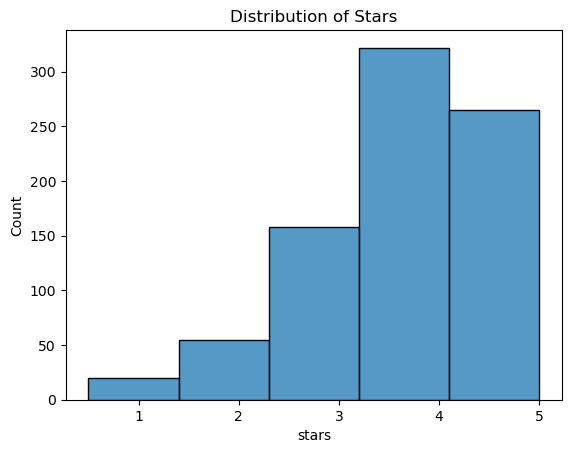

In [36]:
sns.histplot(review1['stars'], bins=5)
plt.title('Distribution of Stars')
plt.show()


In [37]:
correlation_matrix = review1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: "Every evening, the brave queen of Persia, Shahrazad, goes into the Sultan's rooms and begins a weave of words, hoping to entice the Sultan to let her live another night so she can continue her story. But Shahrazad has a big problem: She is running out of stories. With a delicate stroke of luck, a cripple girl, Marjan, ventures into the harem with her Aunt to sell various wares. As her Aunt is selling things, Marjan entertains some of the children with a story. Unbeknownst to Marjan, Shahrazad's sister, Dunyazad, has heard her telling the story. Marjan is taken directly to Shahrazad and asked to recount the story. The tale keeps the queen alive another night and the queen decides to keep Marjan.\n As her helper, Marjan has to go into the city and look for tales that the Sultan has not heard. She has several close calls with the Kathun, the voracious female who rules the harem and who is set against \nShahrazad. Finally the Sultan proclaims that he will stop killing women every night. Unfortunately, Marjan is still in danger and has to be taken out of the city along with Zaynab, an old woman who assisted Marjan. \n Since my mom suggested this book to me, I thought that it would be boring. It was quite the opposite. I was intrigued from the very beginning to the end. I loved the byplay between the characters and the thrilling escapes from various places. One thing that didn't please me was the ending. The ending was abrupt; the story just kind of stopped and left you wondering what happened next in Marjan's life. But all in all, this book was amazing and I have read and re-read it many times "

(-1.0, 8.0)

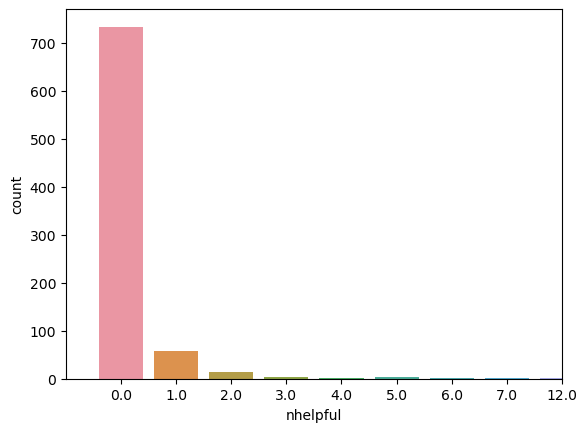

In [38]:
graph=sns.countplot(x='nhelpful',data=review1)
graph.set_xlim(-1,8)


In [39]:
df = review1.copy()
df.loc[:, 'unixtime'] = pd.to_datetime(df['unixtime'], unit='s')

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


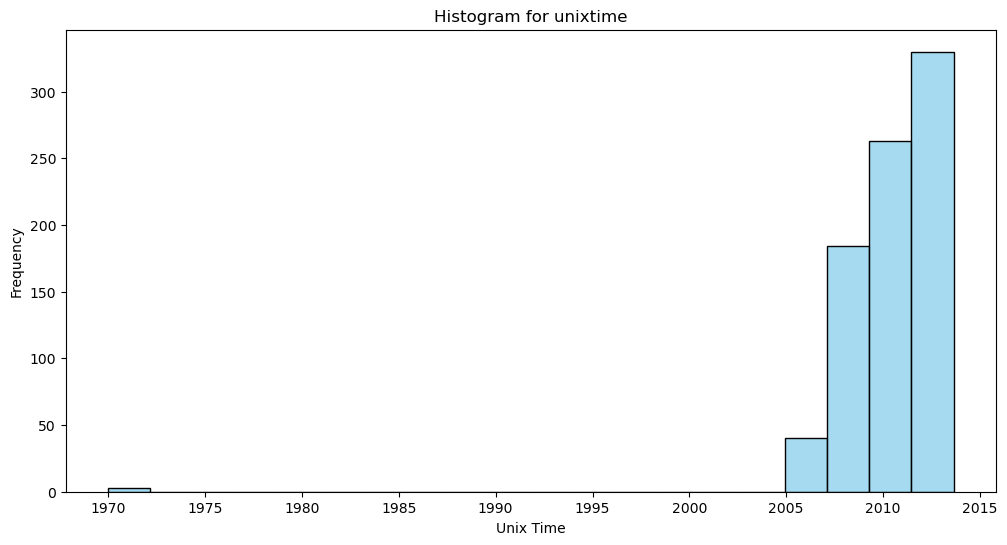

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(df['unixtime'], bins=20, kde=False, color='skyblue')
plt.title('Histogram for unixtime')
plt.xlabel('Unix Time')
plt.ylabel('Frequency')
plt.show()


In [41]:
# The reviews taken were mostly of 2005 and 2015 but a very few were of 1970s.

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


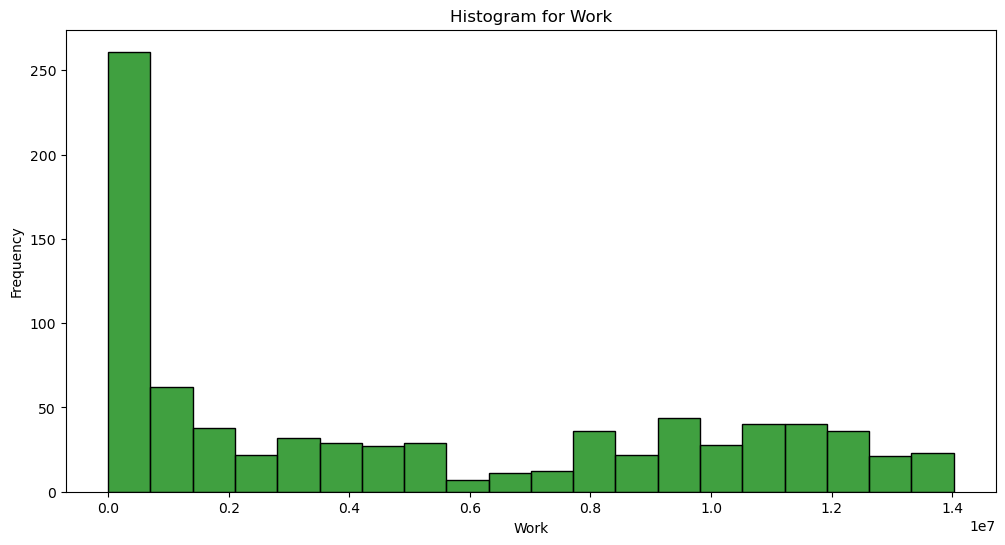

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['work'], bins=20, color='green', kde=False)
plt.title('Histogram for Work')
plt.xlabel('Work')
plt.ylabel('Frequency')
plt.show()

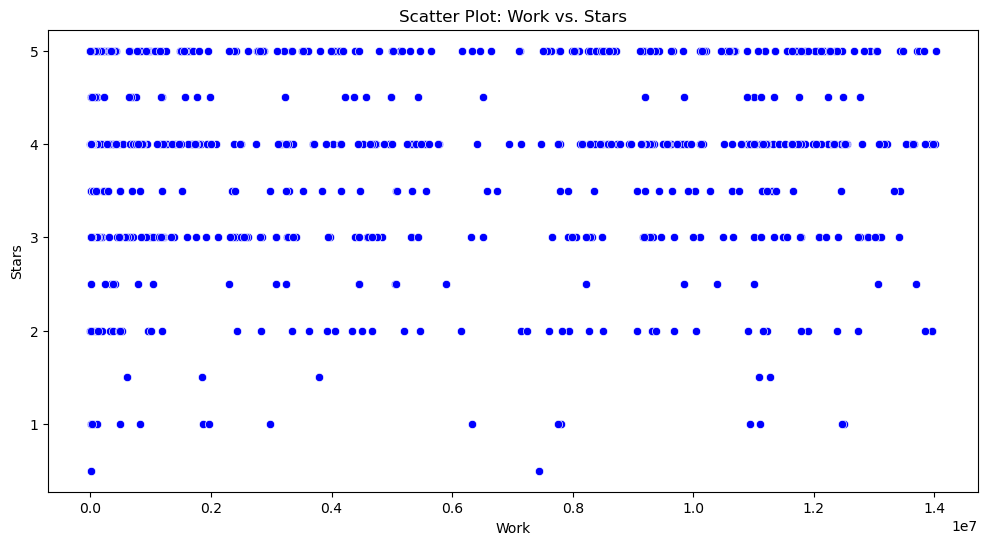

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='work', y='stars', data=df, color='blue')
plt.title('Scatter Plot: Work vs. Stars')
plt.xlabel('Work')
plt.ylabel('Stars')
plt.show()

In [44]:
# The scatter plot of work and star is uniform through the graph, hence suggesting no suggestion between them i.e. suggeseting discrete uniform distribution between them.

In [45]:

review1.head()

,Unnamed: 0,comment,nhelpful,unixtime,work,flags,user,stars,time
1,1,"Every evening, the brave queen of Persia, Shah...",0.0,1.332288e+09,73960.0,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
2,2,Its the 1983-84 school year and Edward Zanni o...,0.0,1.253405e+09,69413.0,[],rivkat,3.0,"Sep 20, 2009"
3,3,"I became privy to this book, when another auth...",0.0,1.299888e+09,9523995.0,[],suz.haugland,4.0,"Mar 12, 2011"
4,4,.,0.0,1.327277e+09,368228.0,[],amoskovacs,4.0,"Jan 23, 2012"
5,5,This is a tremendous story of a freed woman an...,0.0,1.329005e+09,11243828.0,[],CandyH,4.0,"Feb 12, 2012"


In [46]:
review2=review1.drop(['unixtime','time','Unnamed: 0'],axis=1)
review2.head()

,comment,nhelpful,work,flags,user,stars
1,"Every evening, the brave queen of Persia, Shah...",0.0,73960.0,[],Elizabeth.Wong98,4.5
2,Its the 1983-84 school year and Edward Zanni o...,0.0,69413.0,[],rivkat,3.0
3,"I became privy to this book, when another auth...",0.0,9523995.0,[],suz.haugland,4.0
4,.,0.0,368228.0,[],amoskovacs,4.0
5,This is a tremendous story of a freed woman an...,0.0,11243828.0,[],CandyH,4.0


In [47]:
nhelpful_value=review2['nhelpful'].value_counts()
nhelpful_value

nhelpful
0.0     734
1.0      58
2.0      14
5.0       4
3.0       3
6.0       2
7.0       1
4.0       1
16.0      1
22.0      1
12.0      1
Name: count, dtype: int64

In [48]:

flags_value=review2['flags'].value_counts()
flags_value

flags
[]                           807
['not_a_review']              10
['abuse']                      2
['abuse', 'not_a_review']      1
Name: count, dtype: int64

In [49]:

review_final=review2.loc[(review2['flags'] == '[]') | (review2['flags'] == "['abuse']")]
review_final

,comment,nhelpful,work,flags,user,stars
1,"Every evening, the brave queen of Persia, Shah...",0.0,73960.0,[],Elizabeth.Wong98,4.5
2,Its the 1983-84 school year and Edward Zanni o...,0.0,69413.0,[],rivkat,3.0
3,"I became privy to this book, when another auth...",0.0,9523995.0,[],suz.haugland,4.0
4,.,0.0,368228.0,[],amoskovacs,4.0
5,This is a tremendous story of a freed woman an...,0.0,11243828.0,[],CandyH,4.0
...,...,...,...,...,...,...
994,"A miscellany of articles, poems, interviews an...",0.0,791313.0,[],gibbon,4.0
995,Chevalier's Lady and the Unicorn centers aroun...,0.0,2987.0,[],Stewartry,4.0
996,With an abundance of excellent books about the...,1.0,5474830.0,[],khuggard,2.0
999,In the various discussions/writings about the ...,0.0,245554.0,[],cyderry,2.5


In [50]:
review_final.to_csv('reviews_final.csv')


In [51]:
work_value=review_final['work'].value_counts()
work_value

work
8488.0       2
9279041.0    2
4921.0       2
2237.0       2
16195.0      2
            ..
2827447.0    1
1252086.0    1
15223.0      1
805718.0     1
25918.0      1
Name: count, Length: 795, dtype: int64

In [52]:
review_final=pd.read_csv("reviews_final.csv")

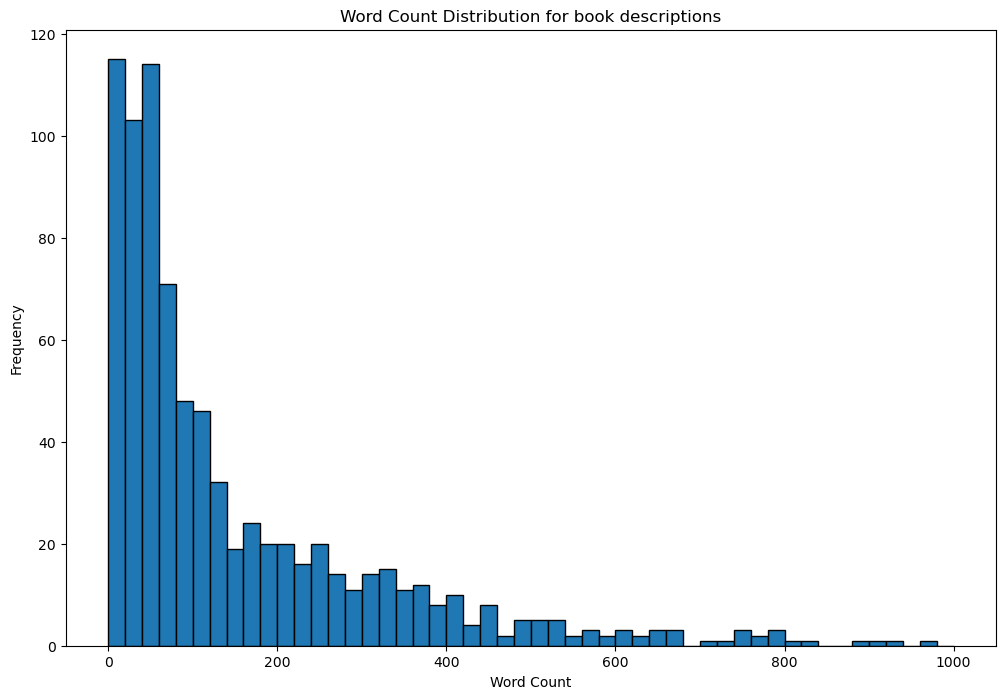

In [53]:
review_final['word_count'] = review_final['comment'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 8))
plt.hist(review_final['word_count'], bins=50, range=(0, 1000), edgecolor='black')
plt.title('Word Count Distribution for book descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [54]:
# The graph shows that the word count for each review is mostly between 1 to 100 and the count decreases non linearly as the word count increases.


In [55]:
review_train=review2[~(review2['flags'].isin([['not_a_review'], ['abuse', 'not_a_review']]))]
review_train

,comment,nhelpful,work,flags,user,stars
1,"Every evening, the brave queen of Persia, Shah...",0.0,73960.0,[],Elizabeth.Wong98,4.5
2,Its the 1983-84 school year and Edward Zanni o...,0.0,69413.0,[],rivkat,3.0
3,"I became privy to this book, when another auth...",0.0,9523995.0,[],suz.haugland,4.0
4,.,0.0,368228.0,[],amoskovacs,4.0
5,This is a tremendous story of a freed woman an...,0.0,11243828.0,[],CandyH,4.0
...,...,...,...,...,...,...
994,"A miscellany of articles, poems, interviews an...",0.0,791313.0,[],gibbon,4.0
995,Chevalier's Lady and the Unicorn centers aroun...,0.0,2987.0,[],Stewartry,4.0
996,With an abundance of excellent books about the...,1.0,5474830.0,[],khuggard,2.0
999,In the various discussions/writings about the ...,0.0,245554.0,[],cyderry,2.5


In [57]:
df = review_final
df=df[1:]
df = df.reset_index()

## Feature Extraction and NLP

In [75]:
df

,index,Unnamed: 0,comment,nhelpful,work,flags,user,stars,word_count,cleaned
0,1,2,Its the 1983-84 school year and Edward Zanni o...,0.0,69413.0,[],rivkat,3.0,119,1983 84 school year edward zanni hoboken figur...
1,2,3,"I became privy to this book, when another auth...",0.0,9523995.0,[],suz.haugland,4.0,565,became privy book another author enjoy reading...
2,3,4,.,0.0,368228.0,[],amoskovacs,4.0,1,
3,4,5,This is a tremendous story of a freed woman an...,0.0,11243828.0,[],CandyH,4.0,79,tremendous story freed woman family sold slave...
4,5,6,"And with this book, I am officially caught up ...",0.0,9071901.0,[],miyurose,2.0,69,book officially caught series unfortunately on...
...,...,...,...,...,...,...,...,...,...,...
803,804,994,"A miscellany of articles, poems, interviews an...",0.0,791313.0,[],gibbon,4.0,32,miscellany articles poems interviews reviews b...
804,805,995,Chevalier's Lady and the Unicorn centers aroun...,0.0,2987.0,[],Stewartry,4.0,203,chevalier s lady unicorn centers around weavin...
805,806,996,With an abundance of excellent books about the...,1.0,5474830.0,[],khuggard,2.0,202,abundance excellent books civil war south slav...
806,807,999,In the various discussions/writings about the ...,0.0,245554.0,[],cyderry,2.5,362,various discussions writings civil war several...


In [76]:
def _removeNonAscii(s):
    s=str(s)
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    text=str(text)
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['comment'].apply(_removeNonAscii)

df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

In [77]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())


In [78]:

model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, 
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
model.build_vocab(corpus, progress_per=200)
model.train(corpus, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(486133, 716650)

In [79]:
watch = df[["work", "comment"]]
watch

,work,comment
0,69413.0,Its the 1983-84 school year and Edward Zanni o...
1,9523995.0,"I became privy to this book, when another auth..."
2,368228.0,.
3,11243828.0,This is a tremendous story of a freed woman an...
4,9071901.0,"And with this book, I am officially caught up ..."
...,...,...
803,791313.0,"A miscellany of articles, poems, interviews an..."
804,2987.0,Chevalier's Lady and the Unicorn centers aroun...
805,5474830.0,With an abundance of excellent books about the...
806,245554.0,In the various discussions/writings about the ...


In [80]:
watch_dict = watch.groupby('work')['comment'].apply(list).to_dict()

## Representation of reviews and Mapping them with users

In [81]:
ms = model.wv.similar_by_vector('every', topn= 6)[1:]
ms

[('act', 0.7289184927940369),
 ('single', 0.7243919372558594),
 ('winner', 0.7112939953804016),
 ('finished', 0.7103400826454163),
 ('toys', 0.7101104259490967)]

In [82]:
def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []
    arr=[]
    # Reading the each book description
    for index, row in df.iterrows():
        line=row['cleaned']
        avgword2vec = None
        count = 0
        """
        for word in model.wv.key_to_index:
            if(word not in line.split()):
                arr.append(0)
            else:
                arr.append(model.wv.key_to_index[word])
        """
        
        for word in line.split():
            if word in model.wv:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
        
        
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
        word_embeddings.append([row['work'],avgword2vec])


In [83]:
vectors(df)
len(word_embeddings)


808

In [84]:
#Building TFIDF model and calculate TFIDF score

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
tfidf.fit(df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names_out(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names_out() # tfidf words/col-names


## Recommender system 

In [85]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
for desc in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(100) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in model.wv and word in tfidf_feature:
            vec = model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [86]:
def recommendations(cleaned):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    
    # taking the title and book image link and store in new data frame called books
    books = df[['work', 'cleaned', 'comment']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['cleaned']).drop_duplicates()
    #print(indices.shape)
    
    idx = indices[cleaned]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    return sim_scores

In [87]:
import requests
from bs4 import BeautifulSoup

def find_title(work):
    a=int(work)
    r = requests.get('https://www.librarything.com/work/'+str(a)+'/workdetails') 

    soup = BeautifulSoup(r.content, 'html.parser') 

    t=str(soup.title)
    t=t.replace("<title>Workdetails: ","")
    t=t.replace(" | LibraryThing</title>","")
    return t


In [88]:
def final_rec(user):
    books = df[['work', 'cleaned', 'comment']]
    dfn = df[df['user']==user]
    c=[]
    for index, row in dfn.iterrows():
        c.append(recommendations(row['cleaned']))
    k=[]
    for i in c:
        for j in i:
            k.append(j)
    k = sorted(k, key = lambda x: x[1], reverse = True)
    k = k[0:6]
    book_indices = [i[0] for i in k]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():
        print(find_title(row['work']))
       

In [90]:
final_rec('suz.haugland')

(808,)
The Late, Lamented Molly Marx by Sally Koslow
The Strangely Beautiful Tale of Miss Percy Parker by Leanna Renee Hieber
Shelter by Harlan Coben
Dakota Home by Debbie Macomber
A Kestrel for a Knave by Barry Hines


## Novelties/ Contributions

Combined the formulations of tf-idf along with pre-trained word2vec model for training and vector formation of word embeddings.
used three matrics for evaluation namely Precision, Recall and F1-score. Worked on two different large scale datasets.

NOTE: the code has been tested on limited part of datasets due to computational constraints.

Contributions:-

Epinions.txt converted to suitable form by Kavisha Madani\
Reviews.txt pre-processed by Shashwat Parikh\
EDA and data analysis done by Kavisha Madani and Mayan Bhut\
Feature Extractions and Vectorization done by Shashwat Parikh and Shubham Gupta\
Model mapping with user done by Shashwat Parikh\
Recommendation system evaluation done in group

## References

1. Practical Recommendation System by Oreilly book
2. Recommendation System textbook by Charu Aggarwal
3. Medium and KDnuggets online articles 
4. (https://medium.com/fnplus/evaluating-recommender-systems-with-python-code-ae0c370c90be)
5. (https://www.kdnuggets.com/2019/11/speed-up-pandas-4x.html)
6. https://medium.com/@toprak.mhmt/content-based-recommender-system-bdfc60b1bee8